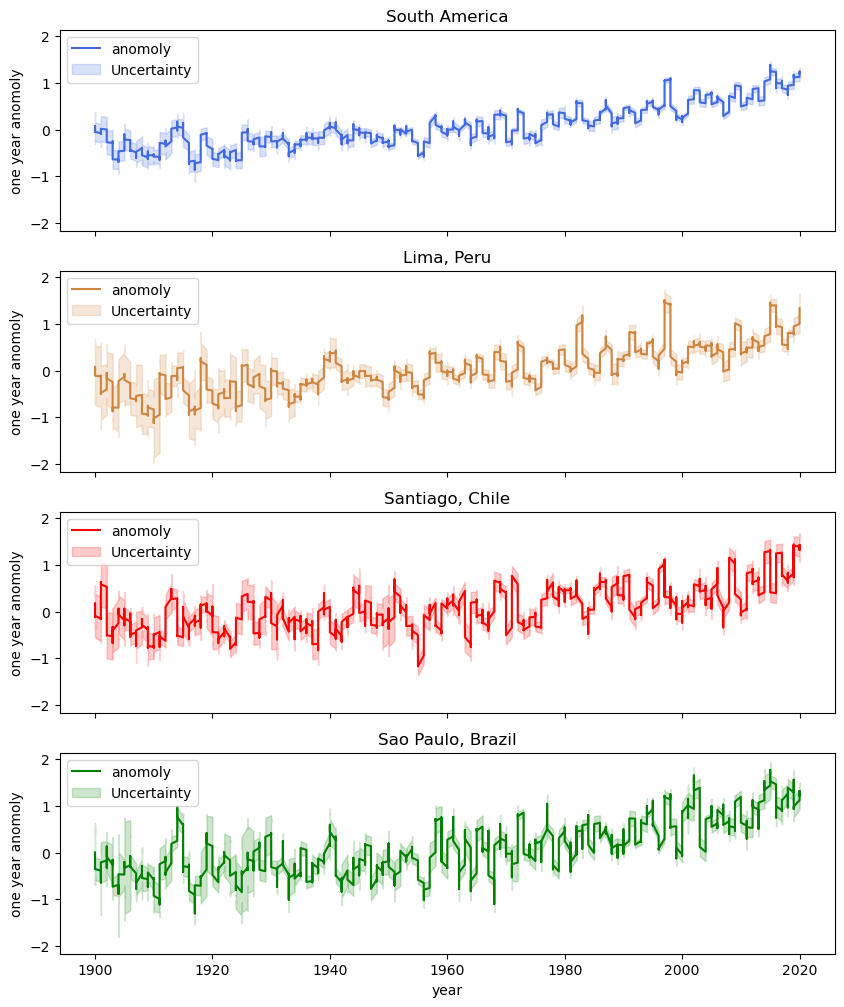

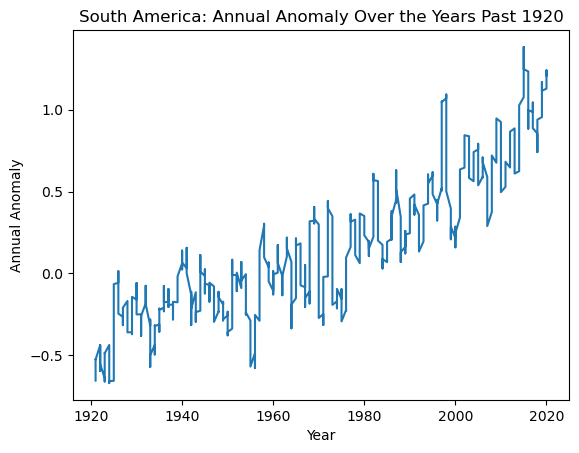

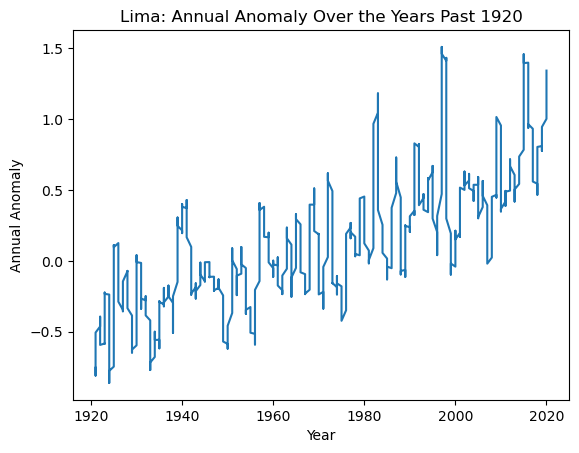

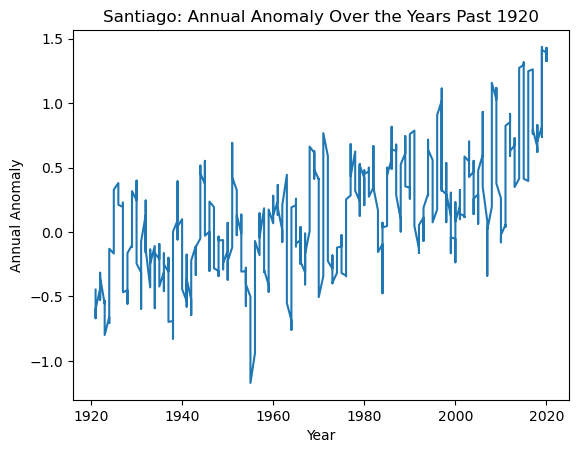

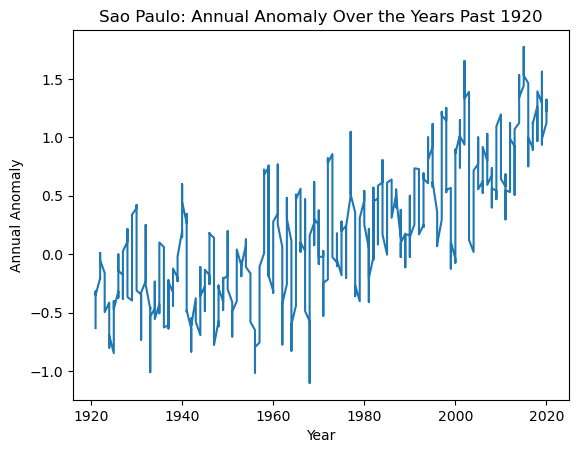

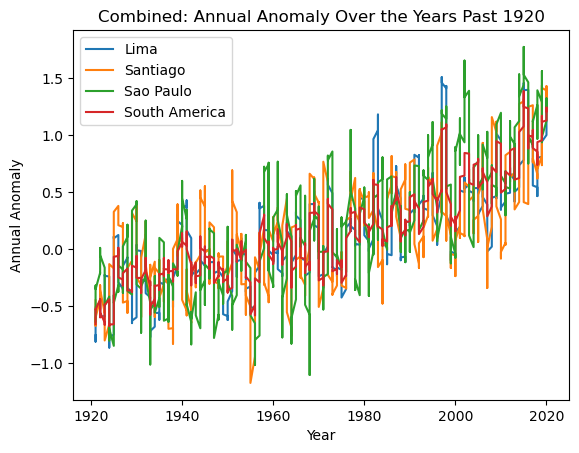

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


%run OtherFiles/Project_2_SO_JB.ipynb

import plotly.express as px


## Combining Temperature and Population Data

In this section, we begin data cleaning on the population data from a file called PopFile.csv which contains populations for the cities in our sample, which are Lima, Santiago, and Sao Paulo.

In [ ]:
# functions

def clean_raw_data(clean_df, raw_data_file, skip):
    raw_data = pd.read_csv(raw_data_file, sep='\t', header=None, skiprows=skip, encoding='latin-1')
    data_col = raw_data[0]

    for row in range(0, len(data_col)):

        data_row = list(map(str, data_col[row].split())) # reformat to make string into list delimited by spaces
        # print(data_row)
        add_row = {} # initialize, and clear dictionary for each row

        for i in range(0, len(data_row)):
            add_row = {'year': data_row[0], 
                    'month': data_row[1],
                    'monthly_anom': data_row[2],
                    'monthly_unc': data_row[3], 
                    'one_yr_anom': data_row[4], 
                    'one_yr_unc': data_row[5]}
            
       

        clean_df = clean_df._append(add_row, ignore_index=True) # append is being depricated, todo: use concat or merge

    # cast year and  month as  int - todo, make timestamp
    clean_df['year'] = clean_df['year'].astype(int)
    clean_df['month'] = clean_df['month'].astype(int)

    # cast weather data (columns 2-5) as floats
    clean_df['monthly_anom'] = clean_df['monthly_anom'].astype(float)
    clean_df['monthly_unc'] = clean_df['monthly_unc'].astype(float)
    clean_df['one_yr_anom'] = clean_df['one_yr_anom'].astype(float)
    clean_df['one_yr_unc'] = clean_df['one_yr_unc'].astype(float)
        
    return clean_df

In [ ]:
pop_file = 'PopLargestCity.csv'

In [ ]:
focus_countries = ['Peru', 'Brazil', 'Chile']
# pop_data = pd.read_csv(pop_file, sep=',')
pop_data = pd.read_csv(pop_file, sep=',', skiprows=4)

focus_mask = pop_data['Country Name'].isin(focus_countries)
pop_data_focus = pop_data[focus_mask]

# drop unnecessary columns
pop_data_focus.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

# transpose the data frame
pop_data_focus = pop_data_focus.transpose()

# rename the columns correctly
pop_data_focus = pop_data_focus.rename(columns={29: 'SaoPaolo', 39: 'Santiago', 186:'Lima'})

# no non-numerics
pop_data_focus = pop_data_focus[pop_data_focus.index.str.isnumeric()]


# # set the index as year
pop_data_focus.index = pop_data_focus.index.astype(int)
pop_data_focus.reset_index(inplace=True)
pop_data_focus.rename(columns={'index': 'year'}, inplace=True)

# Convert the 'Year' column to datetime format
pop_data_focus['date_formatted'] = pd.to_datetime(pop_data_focus['year'], format='%Y')



pop_data_focus.tail(100)

/var/folders/_f/zg3gvs654j7crl3my73hvpt80000gn/T/ipykernel_88222/3470947153.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_data_focus.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)


,year,SaoPaolo,Santiago,Lima,date_formatted
0,1960,4493182.0,1979927.0,1755920.0,1960-01-01
1,1961,4681086.0,2047034.0,1845658.0,1961-01-01
2,1962,4878624.0,2106056.0,1946579.0,1962-01-01
3,1963,5084497.0,2166780.0,2053037.0,1963-01-01
4,1964,5299360.0,2229343.0,2165476.0,1964-01-01
...,...,...,...,...,...
59,2019,21846507.0,6723516.0,10554712.0,2019-01-01
60,2020,22043028.0,6767223.0,10719188.0,2020-01-01
61,2021,22237472.0,6811595.0,10882757.0,2021-01-01
62,2022,22429799.0,6856939.0,11044607.0,2022-01-01


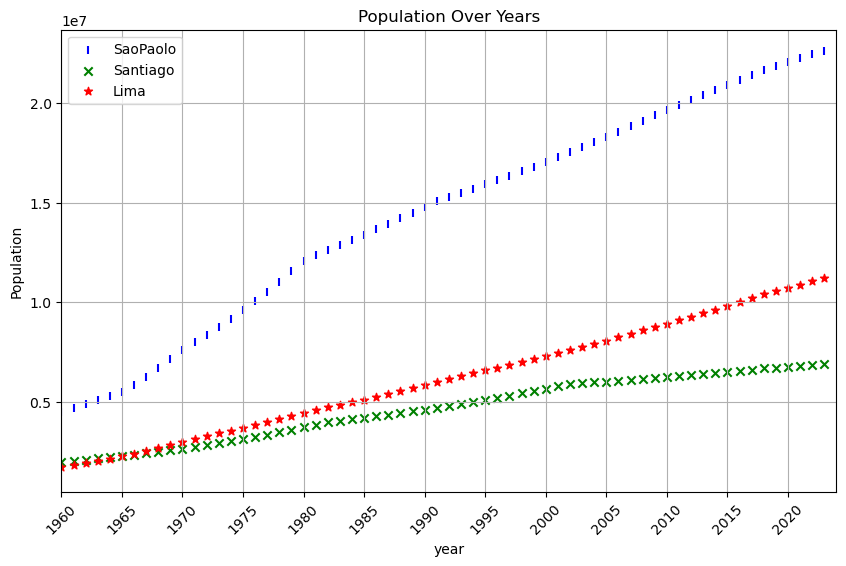

In [ ]:
#pop_data_focus.plot()

plt.figure(figsize=(10, 6))
plt.scatter(pop_data_focus['year'], pop_data_focus['SaoPaolo'], label='SaoPaolo', marker='|', color='blue')
plt.scatter(pop_data_focus['year'], pop_data_focus['Santiago'], label='Santiago', marker='x', color='green')
plt.scatter(pop_data_focus['year'], pop_data_focus['Lima'], label='Lima', marker='*', color='red')

# add labels and title
plt.xlabel('year')
plt.ylabel('Population')
plt.title('Population Over Years')
plt.grid(True)

# set axes
plt.ylim(bottom=500000)
plt.xlim(left=1960, right=pop_data_focus['year'].max() + 1)  # Adding 1 to max year to ensure all points are visible

# Setting custom x-axis ticks
plt.xticks(range(1960, pop_data_focus['year'].max() + 1, 5), rotation=45)


# add legend
plt.legend()

# display the plot
plt.show()






In [ ]:
print(pop_data_focus.columns)
print(pop_data_focus.head(100))

Index(['year', 'SaoPaolo', 'Santiago', 'Lima', 'date_formatted'], dtype='object')
    year    SaoPaolo   Santiago        Lima date_formatted
0   1960   4493182.0  1979927.0   1755920.0     1960-01-01
1   1961   4681086.0  2047034.0   1845658.0     1961-01-01
2   1962   4878624.0  2106056.0   1946579.0     1962-01-01
3   1963   5084497.0  2166780.0   2053037.0     1963-01-01
4   1964   5299360.0  2229343.0   2165476.0     1964-01-01
..   ...         ...        ...         ...            ...
59  2019  21846507.0  6723516.0  10554712.0     2019-01-01
60  2020  22043028.0  6767223.0  10719188.0     2020-01-01
61  2021  22237472.0  6811595.0  10882757.0     2021-01-01
62  2022  22429799.0  6856939.0  11044607.0     2022-01-01
63  2023  22619736.0  6903392.0  11204382.0     2023-01-01

[64 rows x 5 columns]


In [ ]:
# santiago_data.set_index('year')['one_yr_anom'].plot()

south_data.head(100)

# santiago_data.tail()

# lima_data.tail()


# print(str(south_data.tail()))

# saopaulo_data.tail()

,year,month,monthly_anom,monthly_unc,one_yr_anom,one_yr_unc,timestamp
780,1921,1,-0.682,0.395,-0.656,0.151,1921-01-01
781,1921,2,-0.652,0.340,-0.623,0.138,1921-02-01
782,1921,3,-0.679,0.291,-0.622,0.152,1921-03-01
783,1921,4,-0.450,0.265,-0.627,0.153,1921-04-01
784,1921,5,0.156,0.201,-0.635,0.152,1921-05-01
...,...,...,...,...,...,...,...
875,1928,12,-0.467,0.344,-0.361,0.209,1928-12-01
876,1929,1,-0.056,0.506,-0.360,0.208,1929-01-01
877,1929,2,-0.319,0.351,-0.327,0.217,1929-02-01
878,1929,3,-0.531,0.321,-0.304,0.204,1929-03-01


In [ ]:
# lima_data['date_formatted'] = pd.to_datetime(lima_data.year)


lima_data['date_formatted'] = pd.to_datetime(lima_data['year'], format='%Y')


lima_data.tail()




,year,month,monthly_anom,monthly_unc,one_yr_anom,one_yr_unc,timestamp,date_formatted
1543,2020,8,1.803,0.418,NaN,NaN,2020-08-01,2020-01-01
1544,2020,9,1.181,0.328,NaN,NaN,2020-09-01,2020-01-01
1545,2020,10,1.606,0.562,NaN,NaN,2020-10-01,2020-01-01
1546,2020,11,1.766,0.898,NaN,NaN,2020-11-01,2020-01-01
1547,2020,12,0.996,0.941,NaN,NaN,2020-12-01,2020-01-01


In [ ]:
saopaulo_data['date_formatted'] = pd.to_datetime(lima_data['year'], format='%Y')
santiago_data['date_formatted'] = pd.to_datetime(lima_data['year'], format='%Y')

In [ ]:


# pop_data_focus['Brazil mean'] = saopaulo_data.groupby(saopaulo_data.date_formatted.dt.year)['monthly_anom'].transform('mean')


# pop_data_focus['Brazil mean'] = saopaulo_data.groupby('date_formatted')['monthly_anom'].mean().reset_index()

sp_yearly_mean = saopaulo_data.groupby('year')['monthly_anom'].mean().reset_index()
pop_data_focus = pd.merge(pop_data_focus, sp_yearly_mean, on='year', how='left')
pop_data_focus.rename(columns={'monthly_anom': 'SaoPaolo_Mean'}, inplace=True)


st_yearly_mean = santiago_data.groupby('year')['monthly_anom'].mean().reset_index()
pop_data_focus = pd.merge(pop_data_focus, st_yearly_mean, on='year', how='left')
pop_data_focus.rename(columns={'monthly_anom': 'Santiago_Mean'}, inplace=True)

lima_yearly_mean = lima_data.groupby('year')['monthly_anom'].mean().reset_index()
pop_data_focus = pd.merge(pop_data_focus, lima_yearly_mean, on='year', how='left')
pop_data_focus.rename(columns={'monthly_anom': 'Lima_Mean'}, inplace=True)


pop_data_focus.head()

,year,SaoPaolo,Santiago,Lima,date_formatted,SaoPaolo_Mean,Santiago_Mean,Lima_Mean
0,1960,4493182.0,1979927.0,1755920.0,1960-01-01,-0.267750,0.281250,-0.094250
1,1961,4681086.0,2047034.0,1845658.0,1961-01-01,0.738583,0.307250,-0.016083
2,1962,4878624.0,2106056.0,1946579.0,1962-01-01,-0.771583,0.050167,-0.151833
3,1963,5084497.0,2166780.0,2053037.0,1963-01-01,0.482333,-0.303167,0.052083
4,1964,5299360.0,2229343.0,2165476.0,1964-01-01,-0.630583,-0.228083,-0.143417


In [ ]:
# pop_data_focus.transpose()

In [ ]:
# pop_data_focus.to_csv('out.csv', index=False)  

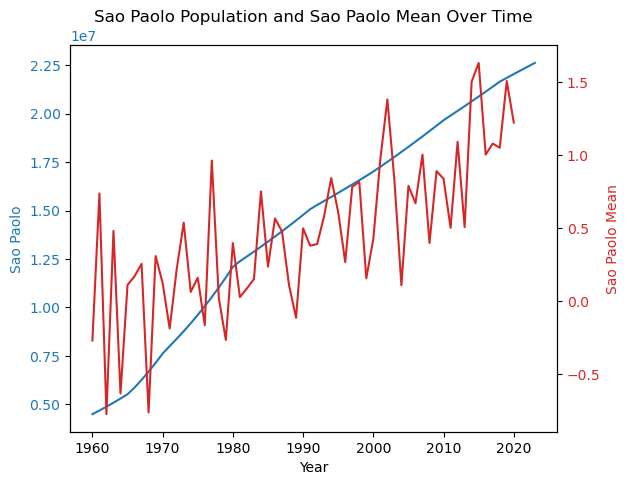

In [ ]:
fig, ax1 = plt.subplots()

# plot 'Brazil' on the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Sao Paolo', color='tab:blue')
ax1.plot(pop_data_focus['year'], pop_data_focus['SaoPaolo'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# create a second y-axis to plot 'Brazil_mean'
ax2 = ax1.twinx()
ax2.set_ylabel('Sao Paolo Mean', color='tab:red')
ax2.plot(pop_data_focus['year'], pop_data_focus['SaoPaolo_Mean'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')



# add title and showing the plot
plt.title('Sao Paolo Population and Sao Paolo Mean Over Time')


fig.tight_layout()  #normalizes the figure
plt.show()




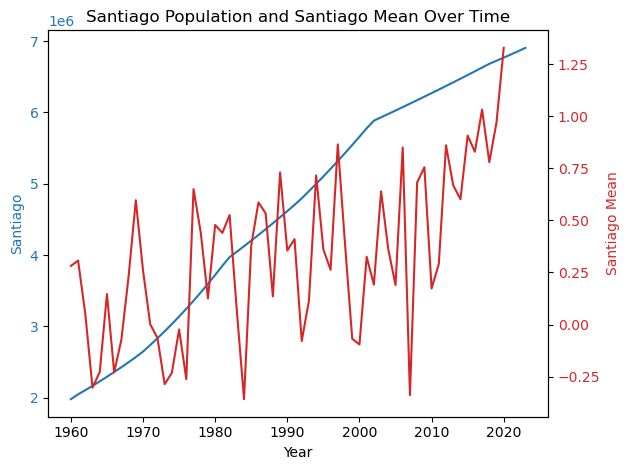

In [ ]:
fig, ax1 = plt.subplots()

# plot 'Brazil' on the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Santiago', color='tab:blue')
ax1.plot(pop_data_focus['year'], pop_data_focus['Santiago'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# create a second y-axis to plot 'Brazil_mean'
ax2 = ax1.twinx()
ax2.set_ylabel('Santiago Mean', color='tab:red')
ax2.plot(pop_data_focus['year'], pop_data_focus['Santiago_Mean'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')



# add title and showing the plot
plt.title('Santiago Population and Santiago Mean Over Time')


fig.tight_layout()  #normalizes the figure
plt.show()


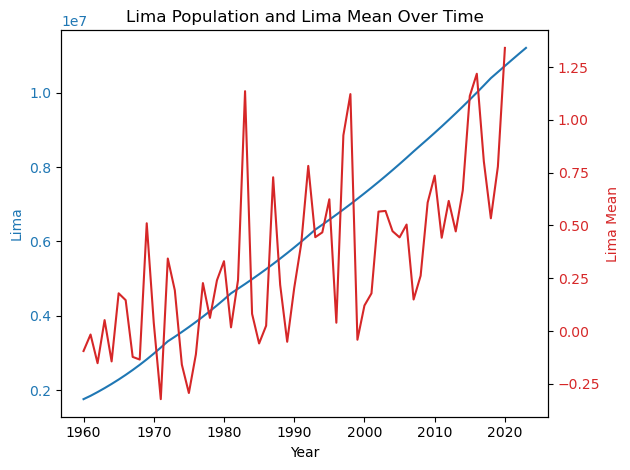

In [ ]:
fig, ax1 = plt.subplots()

# plot 'Brazil' on the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Lima', color='tab:blue')
ax1.plot(pop_data_focus['year'], pop_data_focus['Lima'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# create a second y-axis to plot 'Brazil_mean'
ax2 = ax1.twinx()
ax2.set_ylabel('Lima Mean', color='tab:red')
ax2.plot(pop_data_focus['year'], pop_data_focus['Lima_Mean'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')



# add title and showing the plot
plt.title('Lima Population and Lima Mean Over Time')


fig.tight_layout()  #normalizes the figure
plt.show()


Text(0.05, 0.95, 'r = 0.71')

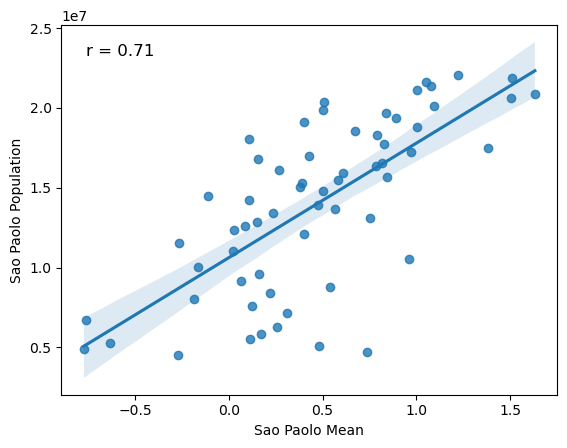

In [ ]:

pop_data_focus_clean = pop_data_focus.replace([np.inf, -np.inf], np.nan).dropna(subset=['SaoPaolo', 'SaoPaolo_Mean'])

r = scipy.stats.pearsonr(x=pop_data_focus_clean['SaoPaolo'], y=pop_data_focus_clean['SaoPaolo_Mean'])[0]


sns.regplot(x='SaoPaolo_Mean', y='SaoPaolo', data=pop_data_focus)

# plt.text(5, 30, 'r = ' + str(round(r, 2)))

plt.xlabel('Sao Paolo Mean')
plt.ylabel('Sao Paolo Population')

plt.text(0.05, 0.95, 'r = ' + str(round(r, 2)), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')



Text(0.05, 0.95, 'r = 0.57')

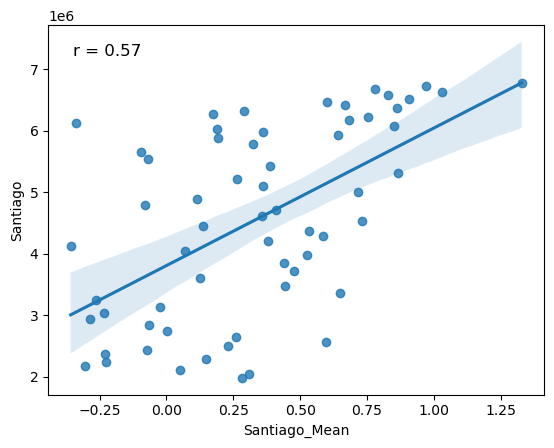

In [ ]:
pop_data_focus_clean = pop_data_focus.replace([np.inf, -np.inf], np.nan).dropna(subset=['Santiago', 'Santiago_Mean'])

r = scipy.stats.pearsonr(x=pop_data_focus_clean['Santiago'], y=pop_data_focus_clean['Santiago_Mean'])[0]


sns.regplot(x='Santiago_Mean', y='Santiago', data=pop_data_focus)

plt.text(0.05, 0.95, 'r = ' + str(round(r, 2)), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


Text(0.05, 0.95, 'r = 0.68')

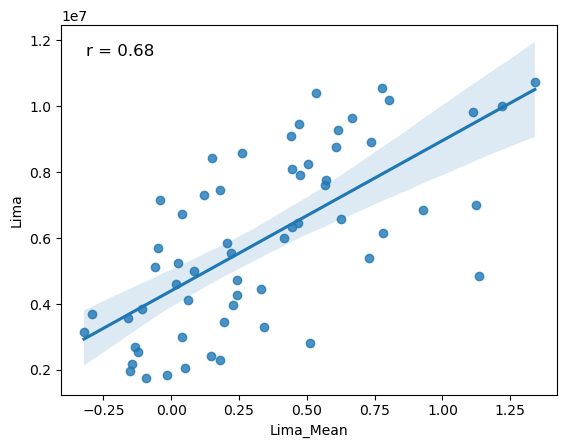

In [ ]:
pop_data_focus_clean = pop_data_focus.replace([np.inf, -np.inf], np.nan).dropna(subset=['Lima', 'Lima_Mean'])

r = scipy.stats.pearsonr(x=pop_data_focus_clean['Lima'], y=pop_data_focus_clean['Lima_Mean'])[0]


sns.regplot(x='Lima_Mean', y='Lima', data=pop_data_focus)

plt.text(0.05, 0.95, 'r = ' + str(round(r, 2)), transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


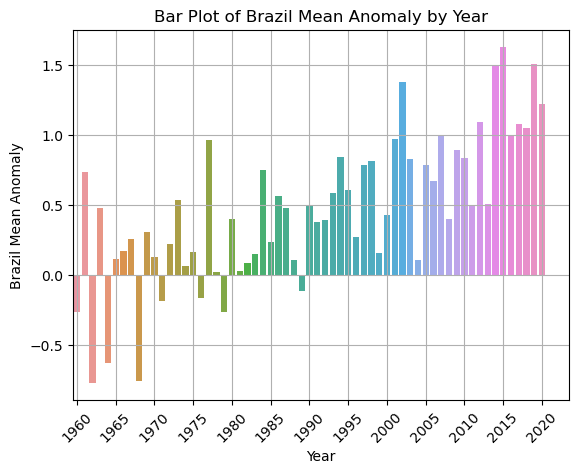

In [ ]:
sns.barplot(x='year', y='Brazil_Mean', data=pop_data_focus)

plt.xticks(ticks=range(0, len(pop_data_focus['year']), 5), labels=pop_data_focus['year'][::5], rotation=45)

plt.xlabel('Year')
plt.ylabel('Brazil Mean Anomaly')
plt.title('Bar Plot of Brazil Mean Anomaly by Year')
plt.grid(True)
plt.show()

In [ ]:
mean_heat = pop_data_focus.iloc[:, 1:]

c = mean_heat.corr()
c

/var/folders/_f/zg3gvs654j7crl3my73hvpt80000gn/T/ipykernel_35899/1703027363.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = mean_heat.corr()


,Brazil,Chile,Peru,Brazil_Mean,Chile_Mean,Peru_Mean
Brazil,1.000000,0.994784,0.987829,0.710916,0.585014,0.666131
Chile,0.994784,1.000000,0.988115,0.714928,0.566967,0.658821
Peru,0.987829,0.988115,1.000000,0.732980,0.603747,0.679023
Brazil_Mean,0.710916,0.714928,0.732980,1.000000,0.499725,0.663157
Chile_Mean,0.585014,0.566967,0.603747,0.499725,1.000000,0.586026
Peru_Mean,0.666131,0.658821,0.679023,0.663157,0.586026,1.000000


<Axes: >

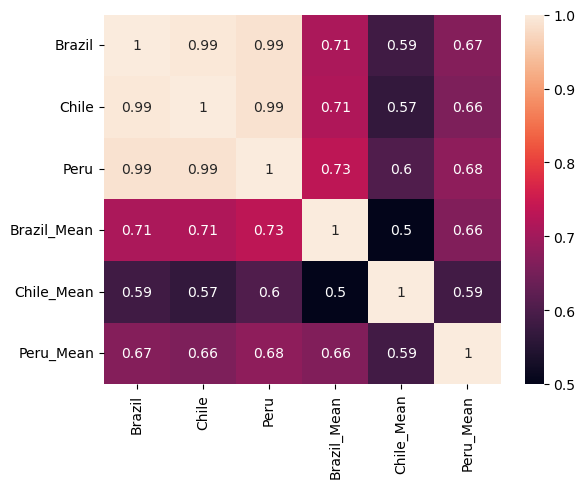

In [ ]:
sns.heatmap(c, annot=True)

In [ ]:
mask = np.ones_like(c, dtype = bool)
mask = np.triu(mask)
mask

array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

<Axes: >

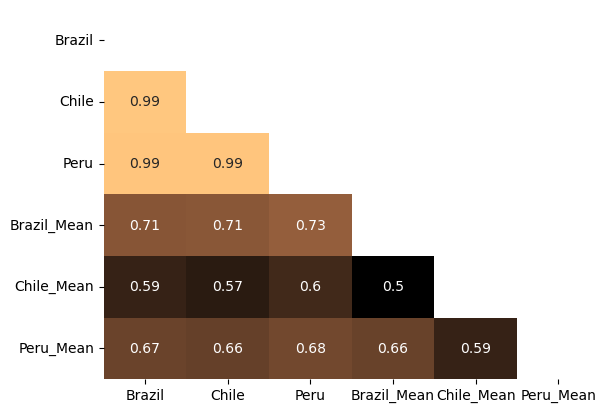

In [ ]:
sns.heatmap(c, annot=True, mask=mask, cmap='copper', cbar=False)